In [1]:
import cv2
import numpy
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pathLast = "./brightfield/0_1683436251000.jpg"

sharp_kernel = np.array([[-1, -1, -1],
                   [-1, 9,-1],
                   [-1, -1, -1]])

blur_kernel = np.ones((3,3),np.float32)/9

In [37]:
def auto_canny_edge_detection(image, sigma=0.33):
    md = np.median(image)
    lower_value = int(max(0, (1.0-sigma) * md))
    upper_value = int(min(255, (1.0+sigma) * md))
    return cv2.Canny(image, lower_value, upper_value)

def blur(image):
    blur = cv2.GaussianBlur(image,(7,7),0)
    return blur

In [77]:
def sharp_and_canny(path):
    img = cv2.imread(path)
    img_sharp = cv2.filter2D(img, -1, sharp_kernel)
    
    edge = auto_canny_edge_detection(img_sharp)
    
    rows, cols = 1,2
    
    plt.subplot(rows, cols, 1)
    plt.imshow(img_sharp)
    plt.title("img_sharp")
    plt.subplot(rows, cols, 2)
    plt.imshow(edge)
    plt.title("edge")
    plt.show()

def canny(path):
    img = cv2.imread(path)
    edge = auto_canny_edge_detection(img)
    
    rows, cols = 1,2
    
    plt.subplot(rows, cols, 1)
    plt.imshow(img)
    plt.title("img")
    plt.subplot(rows, cols, 2)
    plt.imshow(edge)
    plt.title("edge")
    plt.show()

def blur_and_canny(path):
    img = cv2.imread(path)
    img_blur = blur(img)
    edge = auto_canny_edge_detection(img_blur)
    
    
    rows, cols = 1,2
    plt.subplot(rows, cols, 1)
    plt.imshow(img)
    plt.title("img_blur")
    plt.subplot(rows, cols, 2)
    plt.imshow(edge)
    plt.title("edge")
    plt.show()

    cv2.imwrite("edgeb.png", edge)

def sharp_blur_canny(path):
    img = cv2.imread(path)
    img_sharp = cv2.filter2D(img, -1, sharp_kernel)
    img_blur = blur(img_sharp)
    edge = auto_canny_edge_detection(img_blur)
    
    
    rows, cols = 1,2
    plt.subplot(rows, cols, 1)
    plt.imshow(img)
    plt.title("img_sharp_blur")
    plt.subplot(rows, cols, 2)
    plt.imshow(edge)
    plt.title("edge")
    plt.show()

    cv2.imwrite("img.png", img)
    cv2.imwrite("edgesb.png", edge)
    

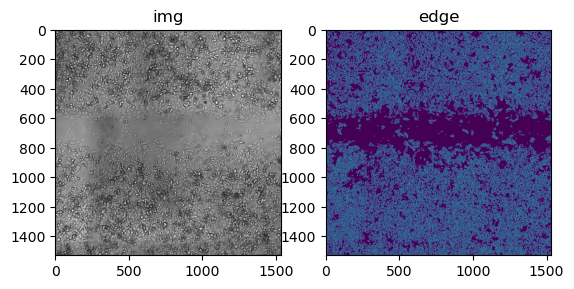

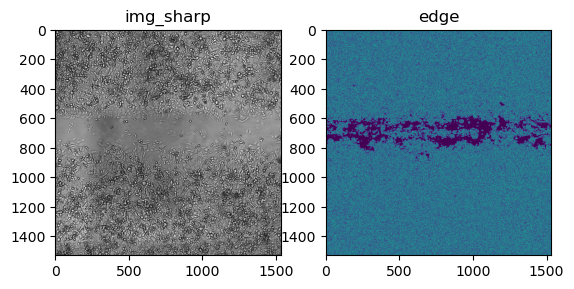

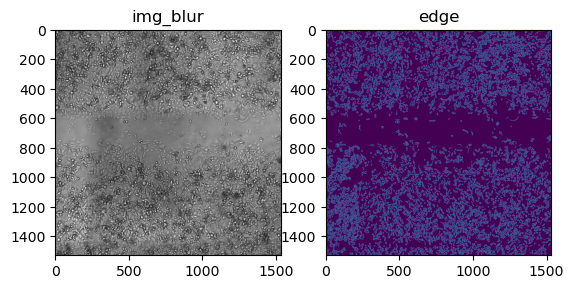

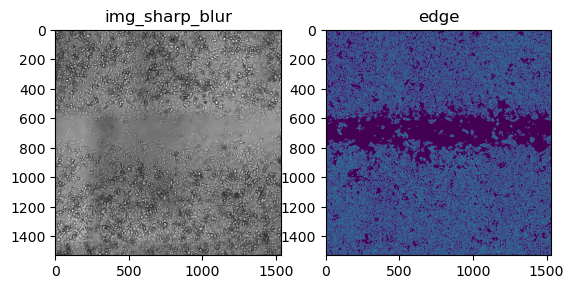

In [78]:
canny(pathLast)
sharp_and_canny(pathLast)
blur_and_canny(pathLast)
sharp_blur_canny(pathLast)